In [1]:
# !pip install tensorflow==2.13.0

In [2]:
!nvidia-smi

Wed Dec 11 12:39:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

TensorFlow Version: 2.16.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7076685308895070215
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 15569186925974076814
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 18194477840692314762
physical_device_desc: "device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5"
xla_global_id: 2144165316
]


In [40]:
# Get directory path

import os

# Base directory path
base_path = '/kaggle/input/real-ai-art/Real_AI_SD_LD_Dataset/train'

# Get all subdirectories in the base path
all_directories = [os.path.join(base_path, folder) for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]
reals = []
fakes = []
# Separate directories into AI and Real based on the naming convention
ai_directories = [dir_path for dir_path in all_directories if os.path.basename(dir_path).startswith('AI_')]
real_directories = [dir_path for dir_path in all_directories if not os.path.basename(dir_path).startswith('AI_')]

# Print the results
print("AI Directories:")
for ai_dir in ai_directories:
    fakes.append(ai_dir)

print("\nReal Directories:")
for real_dir in real_directories:
    reals.append(real_dir)

# Optional: Print the counts
print(f"\nTotal AI Directories: {len(ai_directories)}")
print(f"Total Real Directories: {len(real_directories)}")


AI Directories:

Real Directories:

Total AI Directories: 20
Total Real Directories: 10


In [41]:
# Override output directories

import os
import shutil

# Path to the folder you want to override
folder_path_fake_train = '/kaggle/working/Mixed_dataset/train/Fake'
folder_path_real_train = '/kaggle/working/Mixed_dataset/train/Real'
folder_path_fake_val = '/kaggle/working/Mixed_dataset/val/Fake'
folder_path_real_val = '/kaggle/working/Mixed_dataset/val/Real'

# Remove the existing folder and its contents (if it exists)
def make_folder(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        os.makedirs(folder_path)

    else:
        # Recreate the folder
        os.makedirs(folder_path)

make_folder(folder_path_fake_train)
make_folder(folder_path_real_train)
make_folder(folder_path_fake_val)
make_folder(folder_path_real_val)

In [42]:
# Create dataset

import os
import shutil
import random
from glob import glob

# List of source directories for real and fake images
source_real_dirs = [
    '/kaggle/input/real-fake-image-full-dataset/0_real',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 1/Data Set 1/train/real',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 2/Data Set 2/train/real',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 3/Data Set 3/train/real',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 4/Data Set 4/train/real'
]

for real in reals:
    source_real_dirs.append(real)

source_fake_dirs = [
    '/kaggle/input/real-fake-image-full-dataset/1_fake',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 1/Data Set 1/train/fake',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 2/Data Set 2/train/fake',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 3/Data Set 3/train/fake',
    '/kaggle/input/real-and-fake-images-dataset-for-image-forensics/Data Set 4/Data Set 4/train/fake'
]

for fake in fakes:
    source_fake_dirs.append(fake)

# Paths to the target directories
target_real = '/kaggle/working/Mixed_dataset/train/Real'
target_fake = '/kaggle/working/Mixed_dataset/train/Fake'

all_selected = []

# Function to copy random images from source directories to the target directory
def copy_random_images(source_dirs, target_dir, count):
    for source_dir in source_dirs:
        all_images = []
        # Get all image file paths from the source directory
        images = glob(os.path.join(source_dir, '*'))
        all_images.extend(images)
    
        # Randomly select `count` images (or fewer if not enough images available)
        selected_images = random.sample(all_images, min(count, len(all_images)))
        all_selected.extend(selected_images)

        # Copy the selected images to the target directory
        for img_path in selected_images:
            shutil.copy(img_path, target_dir)

# Copy random images to the target directories
copy_random_images(source_real_dirs, target_real, 500)
copy_random_images(source_fake_dirs, target_fake, 500)

# Function to shuffle images in the target directory
def shuffle_images(directory):
    # Get all image paths in the directory
    images = glob(os.path.join(directory, '*'))
    
    # Shuffle the images
    random.shuffle(images)
    
# Shuffle images in both target directories
shuffle_images(target_real)
shuffle_images(target_fake)

print(f"Images have been copied and shuffled in:\n- {target_real}\n- {target_fake}")

Images have been copied and shuffled in:
- /kaggle/working/Mixed_dataset/train/Real
- /kaggle/working/Mixed_dataset/train/Fake


In [43]:
target_real = '/kaggle/working/Mixed_dataset/val/Real'
target_fake = '/kaggle/working/Mixed_dataset/val/Fake'


# Function to copy random images from source directories to the target directory for validation
def copy_random_images_val(source_dirs, target_dir, count):
    for source_dir in source_dirs:
        image_count=count
        all_images = []
        # Get all image file paths from the source directory
        images = glob(os.path.join(source_dir, '*'))
        all_images.extend(images)
    
        # Randomly select `count` images (or fewer if not enough images available)
        while image_count != 0:
            selected_image = random.sample(all_images, 1)
            if selected_image[0] not in all_selected:
                shutil.copy(selected_image[0], target_dir)
                image_count=image_count-1

copy_random_images_val(source_real_dirs, target_real, 500)
copy_random_images_val(source_fake_dirs, target_fake, 500)

print(f"Images have been copied in:\n- {target_real}\n- {target_fake}")

Images have been copied in:
- /kaggle/working/Mixed_dataset/val/Real
- /kaggle/working/Mixed_dataset/val/Fake


In [44]:
import PIL.Image
import cv2
import numpy as np
import random
import concurrent.futures

def img_to_patches(input_path:str) -> tuple:
    """
    Returns 32x32 patches of a resized 256x256 images,
    it returns 64x64 patches on grayscale and 64x64 patches
    on the RGB color scale
    --------------------------------------------------------
    ## parameters:
    - input_path: Accepts input path of the image
    """
    img = PIL.Image.open(fp=input_path)
    if(input_path[-3:]!='jpg' or input_path[-4:]!='jpeg'):
        img = img.convert('RGB')
    if(img.size!=(256,256)):
        img = img.resize(size=(256,256))
    patch_size = 32
    grayscale_imgs = []
    imgs = []
    for i in range(0,img.height,patch_size):
        for j in range(0, img.width, patch_size):
            box = (j,i,j+patch_size,i+patch_size)
            img_color = np.asarray(img.crop(box))
            grayscale_image = cv2.cvtColor(src=img_color, code=cv2.COLOR_RGB2GRAY)
            grayscale_imgs.append(grayscale_image.astype(dtype=np.int32))
            imgs.append(img_color)
    return grayscale_imgs,imgs



def get_l1(v,x,y):
    l1=0
    # 1 to m, 1 to m-1
    for i in range(0,y-1):
        for j  in range(0,x):
            l1+=abs(v[j][i]-v[j][i+1])
    return l1

def get_l2(v,x,y):
    l2=0
    # 1 to m-1, 1 to m
    for i in range(0,y):
        for j  in range(0,x-1):
            l2+=abs(v[j][i]-v[j+1][i])
    return l2

def get_l3l4(v,x,y):
    l3=l4=0
    # 1 to m-1, 1 to m-1
    for i in range(0,y-1):
        for j  in range(0,x-1):
            l3+=abs(v[j][i]-v[j+1][i+1])
            l4+=abs(v[j+1][i]-v[j][i+1])

    return l3+l4

def get_pixel_var_degree_for_patch(patch:np.array)->int:
    """
    gives pixel variation for a given patch
    ---------------------------------------
    ## parameters:
    - patch: accepts a numpy array format of the patch of an image
    """
    x,y = patch.shape
    l1=l2=l3l4=0
    
    with concurrent.futures.ThreadPoolExecutor(max_workers=3) as executor:
        future_l1 = executor.submit(get_l1,patch,x,y)
        future_l2 = executor.submit(get_l2,patch,x,y)
        future_l3l4 = executor.submit(get_l3l4,patch,x,y)

        l1 = future_l1.result()
        l2 = future_l2.result()
        l3l4 = future_l3l4.result()

    return  l1+l2+l3l4


def extract_rich_and_poor_textures(variance_values:list, patches:list):
    """
    returns a list of rich texture and poor texture patches respectively
    --------------------------------------------------------------------
    ## parameters:
    - variance_values: list of values that are pixel variances of each patch
    - color_patches: coloured patches of the target image
    """
    threshold = np.mean(variance_values)
    rich_texture_patches = []
    poor_texture_patches = []
    for i,j in enumerate(variance_values):
        if j >= threshold:
            rich_texture_patches.append(patches[i])
        else:
            poor_texture_patches.append(patches[i])
    
    return rich_texture_patches, poor_texture_patches



def get_complete_image(patches:list, coloured=True):
    """
    Develops complete 265x256 image from rich and poor texture patches
    ------------------------------------------------------------------
    ## parameters:
    - patches: Takes a list of rich or poor texture patches
    """
    random.shuffle(patches)
    p_len = len(patches)
    while len(patches)<64:
        patches.append(patches[random.randint(0, p_len-1)])
    
    if(coloured==True):
        grid = np.asarray(patches).reshape((8,8,32,32,3))
    else:
        grid = np.asarray(patches).reshape((8,8,32,32))


    # joins columns to only leave rows
    rows = [np.concatenate(grid[i,:], axis=1) for i in range(8)]

    # joins the rows to create the final image
    img = np.concatenate(rows,axis=0)

    return img
    


def smash_n_reconstruct(input_path:str, coloured=True):
    """
    Performs the SmashnReconstruct part of preprocesing
    reference: [link](https://arxiv.org/abs/2311.12397)

    return rich_texture,poor_texture
    
    ----------------------------------------------------
    ## parameters:
    - input_path: Accepts input path of the image
    """
    gray_scale_patches, color_patches = img_to_patches(input_path=input_path)
    pixel_var_degree = []
    for patch in gray_scale_patches:
        pixel_var_degree.append(get_pixel_var_degree_for_patch(patch))
    
    # r_patch = list of rich texture patches, p_patch = list of poor texture patches
    if(coloured):
        r_patch,p_patch = extract_rich_and_poor_textures(variance_values=pixel_var_degree,patches=color_patches)
    else:
        r_patch,p_patch = extract_rich_and_poor_textures(variance_values=pixel_var_degree,patches=gray_scale_patches)
    rich_texture,poor_texture = None,None

    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        rich_texture_future = executor.submit(get_complete_image,r_patch,coloured)
        poor_texture_future = executor.submit(get_complete_image,p_patch,coloured)

        rich_texture = rich_texture_future.result()
        poor_texture = poor_texture_future.result()

    return rich_texture, poor_texture

if __name__=="main":
    smash_n_reconstruct(input_path="placeholder")

In [45]:
import numpy as np
import cv2
from scipy.ndimage import rotate

def apply_filter_a(src:np.ndarray):
    src_copy = np.copy(src)
    f1 = np.array([[[ 0,  0,  0,  0,  0],
        [ 0,  1,  0,  0,  0],
        [ 0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0],
        [ 0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0],
        [ 0,  0, -1,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0, -1,  1,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0],
        [ 0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0],
        [ 0,  0,  1,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0],
        [ 0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0]],

       [[ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  1, -1,  0,  0],
        [ 0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0]]])
    
    img = cv2.filter2D(src=src_copy, kernel=f1[0], ddepth=-1)
    for filter in f1[1:]:
        img = cv2.add(img,cv2.filter2D(src=src_copy, kernel=filter, ddepth=-1))

    return img//8

def apply_filter_b(src:np.ndarray):
    src_copy = np.copy(src)
    f2 = np.array([[[ 0,  0,  0,  0,  0],
                    [ 0,  2,  1,  0,  0],
                    [ 0,  1, -3,  0,  0],
                    [ 0,  0,  0,  1,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0, -1,  0,  0],
                    [ 0,  0,  3,  0,  0],
                    [ 0,  0, -3,  0,  0],
                    [ 0,  0,  1,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  1,  2,  0],
                    [ 0,  0, -3,  1,  0],
                    [ 0,  1,  0,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  1, -3,  3, -1],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  1,  0,  0,  0],
                    [ 0,  0, -3,  1,  0],
                    [ 0,  0,  1,  2,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  1,  0,  0],
                    [ 0,  0, -3,  0,  0],
                    [ 0,  0,  3,  0,  0],
                    [ 0,  0, -1,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  1,  0],
                    [ 0,  1, -3,  0,  0],
                    [ 0,  2,  1,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0],
                    [-1,  3, -3,  1,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0]]])

    img = cv2.filter2D(src=src_copy, kernel=f2[0], ddepth=-1)
    for filter in f2[1:]:
        img = cv2.add(img,cv2.filter2D(src=src_copy, kernel=filter, ddepth=-1))

    return img//8



def apply_filter_c(src:np.ndarray):
    src_copy=np.copy(src)
    f3 = np.array([[[ 0,  0,  0,  0,  0],
                    [ 0,  0,  1,  0,  0],
                    [ 0,  0, -2,  0,  0],
                    [ 0,  0,  1,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  1, -2,  1,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  1,  0,  0,  0],
                    [ 0,  0, -2,  0,  0],
                    [ 0,  0,  0,  1,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  1,  0],
                    [ 0,  0, -2,  0,  0],
                    [ 0,  1,  0,  0,  0],
                    [ 0,  0,  0,  0,  0]]])
    
    img = cv2.filter2D(src=src_copy, kernel=f3[0], ddepth=-1)
    for filter in f3[1:]:
        img = cv2.add(img,cv2.filter2D(src=src_copy, kernel=filter, ddepth=-1))

    return img//4


def apply_filter_d(src:np.ndarray):
    src_copy=np.copy(src)
    f4 = np.array([[[ 0,  0,  0,  0,  0],
                    [ 0, -1,  2, -1,  0],
                    [ 0,  2, -4,  2,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0, -1,  2,  0,  0],
                    [ 0,  2, -4,  0,  0],
                    [ 0, -1,  2,  0,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  0,  0,  0],
                    [ 0,  2, -4,  2,  0],
                    [ 0, -1,  2, -1,  0],
                    [ 0,  0,  0,  0,  0]],

                    [[ 0,  0,  0,  0,  0],
                    [ 0,  0,  2, -1,  0],
                    [ 0,  0, -4,  2,  0],
                    [ 0,  0,  2, -1,  0],
                    [ 0,  0,  0,  0,  0]]])

    img = cv2.filter2D(src=src_copy, kernel=f4[0], ddepth=-1)
    for filter in f4[1:]:
        img = cv2.add(img,cv2.filter2D(src=src_copy, kernel=filter, ddepth=-1))

    return img//4

def apply_filter_e(src:np.ndarray):
    src_copy=np.copy(src)
    f5 = np.array([[[  1,   2,  -2,   2,   1],
                    [  2,  -6,   8,  -6,   2],
                    [ -2,   8, -12,   8,  -2],
                    [  0,   0,   0,   0,   0],
                    [  0,   0,   0,   0,   0]],

                [[  1,   2,  -2,   0,   0],
                    [  2,  -6,   8,   0,   0],
                    [ -2,   8, -12,   0,   0],
                    [  2,  -6,   8,   0,   0],
                    [  1,   2,  -2,   0,   0]],

                [[  0,   0,   0,   0,   0],
                    [  0,   0,   0,   0,   0],
                    [ -2,   8, -12,   8,  -2],
                    [  2,  -6,   8,  -6,   2],
                    [  1,   2,  -2,   2,   1]],

                [[  0,   0,  -2,   2,   1],
                    [  0,   0,   8,  -6,   2],
                    [  0,   0, -12,   8,  -2],
                    [  0,   0,   8,  -6,   2],
                    [  0,   0,  -2,   2,   1]]])
    
    img = cv2.filter2D(src=src_copy, kernel=f5[0], ddepth=-1)
    for filter in f5[1:]:
        img=cv2.add(img,cv2.filter2D(src=src_copy, kernel=filter, ddepth=-1))

    return img//4

def apply_filter_f(src:np.ndarray):
    src_copy=np.copy(src)
    f5 = np.asarray([[ 0,  0,  0,  0,  0],
                    [ 0,  -1,  2, -1,  0],
                    [ 0,  2,  -4,  2,  0],
                    [ 0,  -1,  2, -1,  0],
                    [ 0,  0,  0,  0,  0]])
    
    img = cv2.filter2D(src=src_copy, kernel=f5, ddepth=-1)
    return img


def apply_filter_g(src:np.ndarray):
    src_copy=np.copy(src)
    f5 = np.asarray([[ -1,   2,  -2,   2,  -1],
                    [  2,  -6,   8,  -6,   2],
                    [ -2,   8, -12,   8,  -2],
                    [  2,  -6,   8,  -6,   2],
                    [ -1,   2,  -2,   2,  -1]])
    
    img = cv2.filter2D(src=src_copy, kernel=f5, ddepth=-1)
    return img

def apply_all_filters(src:np.ndarray):
    src_copy = np.copy(src)
    img = np.array(cv2.cvtColor((apply_filter_a(src_copy) + apply_filter_b(src_copy) + apply_filter_c(src_copy) + \
            apply_filter_d(src_copy) + apply_filter_e(src_copy) + apply_filter_f(src_copy) + apply_filter_g(src_copy)), cv2.COLOR_RGB2GRAY)//7)
    img_thresh = np.median(img)+2
    return cv2.threshold(img,img_thresh,255,cv2.THRESH_BINARY)[1]

In [46]:
import tensorflow as tf
from keras import layers,Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [47]:
@tf.function
def hard_tanh(x):
    return tf.maximum(tf.minimum(x, 1), -1)

class featureExtractionLayer(layers.Layer):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.conv = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')
        self.bn = layers.BatchNormalization()
        self.activation = layers.Lambda(hard_tanh)
        
    
    def call(self, input):
        x = self.conv(input)
        x = self.bn(x)
        x = self.activation(x)
        return x

In [48]:
input1 = layers.Input(shape=(256,256,1),name="rich_texture")
input2 = layers.Input(shape=(256,256,1),name="poor_texture")

l1 = featureExtractionLayer(name="feature_extraction_layer_rich_texture")(input1)
l2 = featureExtractionLayer(name="feature_extraction_layer_poor_texture")(input2)

contrast = layers.subtract((l1,l2))

x = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(contrast)
x = layers.BatchNormalization()(x)
for i in range(3):
    x = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
    x = layers.BatchNormalization()(x)
x = layers.BatchNormalization()(x)

for i in range(4):
    x = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
    x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(3,3)(x)

for i in range(2):
    x = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
    x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(3,3)(x)

for i in range(2):
    x = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(x)
    x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Flatten()(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = Model(inputs=(input1,input2), outputs=x, name="rich_texture_poor_texture_contrast")
model.compile(
                optimizer='adam',
                loss='BinaryCrossentropy',
                metrics=['binary_accuracy']
            )
model.summary()

Model: "rich_texture_poor_texture_contrast"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ rich_texture        │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ poor_texture        │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_extraction… │ (None, 254, 254,  │        448 │ rich_texture[0][… │
│ (featureExtraction… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ feature_extraction… │ (None, 254, 254,  │        448 │ poor_texture[0][… │
│ (featureExtraction… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_1          │ (None, 254, 254,  │          0 │ feature_extracti… │
│ (Subtract)          │ 32)               │            │ feature_extracti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 252, 252,  │      9,248 │ subtract_1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 252, 252,  │        128 │ conv2d_32[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 250, 250,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 250, 250,  │        128 │ conv2d_33[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 248, 248,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 248, 248,  │        128 │ conv2d_34[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 246, 246,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 246, 246,  │        128 │ conv2d_35[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 246, 246,  │        128 │ batch_normalizat… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 244, 244,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 244, 244,  │        128 │ conv2d_36[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 242, 242,  │      9,248 │ batch_normalizat

 Total params: 113,569 (443.63 KB)

 Trainable params: 112,609 (439.88 KB)

 Non-trainable params: 960 (3.75 KB)

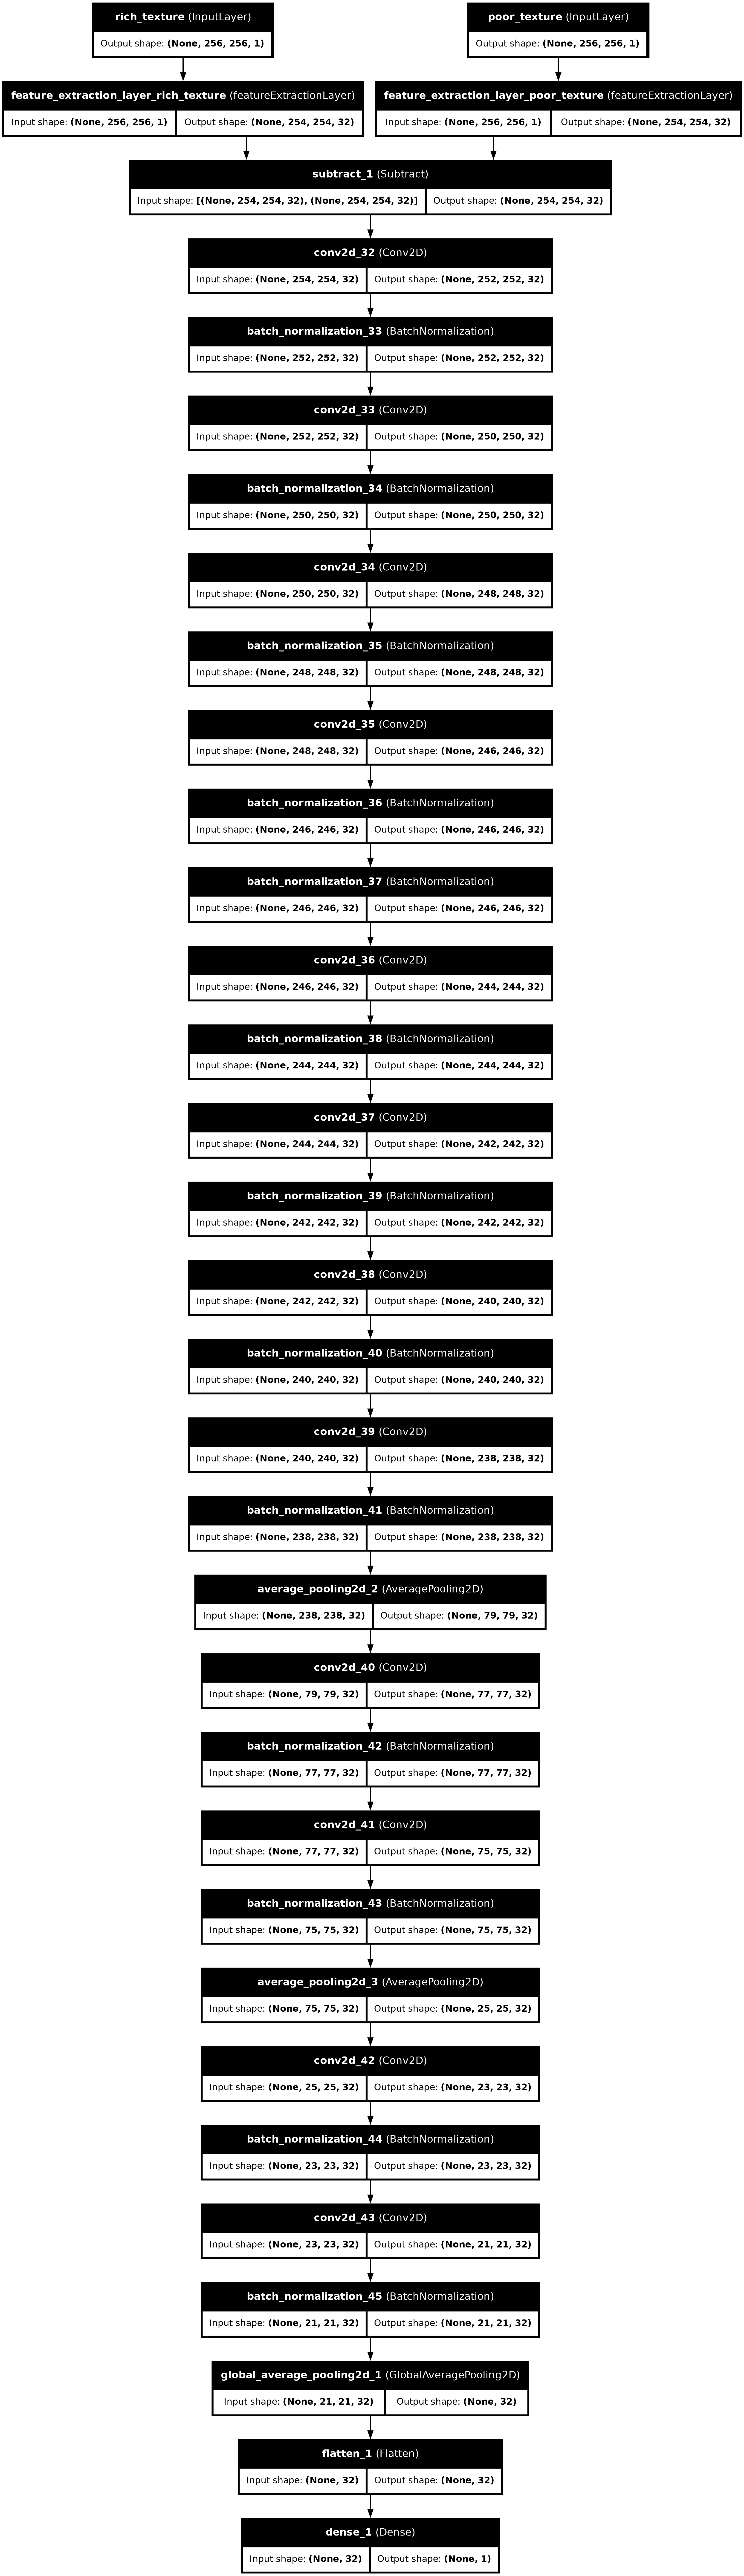

In [49]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image(filename='model_plot.png')

In [50]:
path_ai_train = '/kaggle/working/Mixed_dataset/train/Fake'
ai_imgs_train = [os.path.join(path_ai_train,img) for img in os.listdir(path_ai_train)]
ai_label_train = [1 for i in range(len(ai_imgs_train))]
path_real_train = '/kaggle/working/Mixed_dataset/train/Real'
real_imgs_train = [os.path.join(path_real_train,img) for img in os.listdir(path_real_train)]
real_label_train = [0 for i in range(len(real_imgs_train))]
print(len(real_imgs_train),len(ai_imgs_train))
X_train = ai_imgs_train + real_imgs_train
y_train = ai_label_train + real_label_train

7500 12500


In [51]:
path_ai_val = '/kaggle/working/Mixed_dataset/val/Fake'
ai_imgs_val = [os.path.join(path_ai_val,img) for img in os.listdir(path_ai_val)]
ai_label_val = [1 for i in range(len(ai_imgs_val))]
path_real_val = '/kaggle/working/Mixed_dataset/val/Real'
real_imgs_val = [os.path.join(path_real_val,img) for img in os.listdir(path_real_val)]
real_label_val = [0 for i in range(len(real_imgs_val))]
print(len(real_imgs_val),len(ai_imgs_val))
X_validate = ai_imgs_val + real_imgs_val
y_validate = ai_label_val + real_label_val

7206 11987


In [52]:
len(X_train),len(y_train),len(X_validate),len(y_validate)

(20000, 20000, 19193, 19193)

In [53]:
def preprocess(path, label):
    # Convert path to string if it's a tensor
    path = path.numpy().decode('utf-8') if tf.is_tensor(path) else path
    
    try:
        # Perform preprocessing
        rt, pt = smash_n_reconstruct(path)
        
        # Apply filters and ensure consistent shape
        frt = tf.cast(tf.expand_dims(apply_all_filters(rt), axis=-1), dtype=tf.float64)
        fpt = tf.cast(tf.expand_dims(apply_all_filters(pt), axis=-1), dtype=tf.float64)
        
        # Ensure shape
        frt = tf.ensure_shape(frt, [256, 256, 1])
        fpt = tf.ensure_shape(fpt, [256, 256, 1])
        label = tf.ensure_shape(label, [])
        
        return frt, fpt, label
        
    except Exception as e:
        print(f"Error processing {path}: {e}")
        # Return dummy tensors to avoid breaking the pipeline
        dummy = tf.zeros([256, 256, 1], dtype=tf.float32)
        return dummy, dummy, label

In [54]:
def dict_map(X1,X2,y):
    return {
        'rich_texture':X1,
        'poor_texture':X2
    },y

In [55]:
batch_size = 32

dataset = (tf.data.Dataset.from_tensor_slices((X_train, y_train))
           .shuffle(len(X_train))
           .map(
                lambda filepath, label: 
                tf.py_function(preprocess, [filepath, label], [tf.float64, tf.float64, tf.int32])
            )
           .map(
                lambda rich_texture, poor_texture, label: (
                    {
                        'rich_texture': tf.ensure_shape(rich_texture, (256, 256, 1)),
                        'poor_texture': tf.ensure_shape(poor_texture, (256, 256, 1))
                    },
                    tf.ensure_shape(label, [])
                )
            )
           .batch(batch_size)
           .prefetch(tf.data.AUTOTUNE)
        )

validation_set = (tf.data.Dataset.from_tensor_slices((X_validate, y_validate))
                  .map(
                       lambda filepath, label: 
                       tf.py_function(preprocess, [filepath, label], [tf.float64, tf.float64, tf.int32])
                   )
                  .map(
                       lambda rich_texture, poor_texture, label: (
                           {
                               'rich_texture': tf.ensure_shape(rich_texture, (256, 256, 1)),
                               'poor_texture': tf.ensure_shape(poor_texture, (256, 256, 1))
                           },
                           tf.ensure_shape(label, [])
                       )
                   )
                  .batch(batch_size)
                  .prefetch(tf.data.AUTOTUNE)
              )

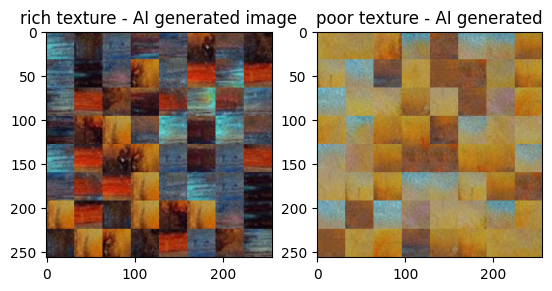

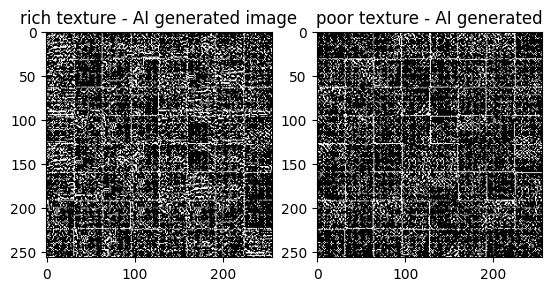

In [56]:
import matplotlib.pyplot as plt

# Check a single image preprocessing
sample_path = X_train[1]
rt, pt = smash_n_reconstruct(sample_path)
plt.subplot(1,2,1)
plt.imshow(rt)
plt.title('rich texture - AI generated image')
plt.subplot(1,2,2)
plt.imshow(pt)
plt.title('poor texture - AI generated')
plt.show()

rt = apply_all_filters(rt)
pt = apply_all_filters(pt)
plt.subplot(1,2,1)
plt.imshow(rt, cmap = 'gray')
plt.title('rich texture - AI generated image')
plt.subplot(1,2,2)
plt.imshow(pt, cmap = 'gray')
plt.title('poor texture - AI generated')
plt.show()

In [57]:
for data, labels in dataset.take(1):
    print("Input shapes:", {k: v.shape for k, v in data.items()})
    print("Label shape:", labels.shape)

Input shapes: {'rich_texture': TensorShape([32, 256, 256, 1]), 'poor_texture': TensorShape([32, 256, 256, 1])}
Label shape: (32,)


In [58]:
checkpoint_path = "/kaggle/working/model_checkpoint.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, 
                                      monitor='val_loss', 
                                      save_best_only=True,
                                      verbose=1)

early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=20,
                                        verbose=1, 
                                        restore_best_weights=True)

In [59]:
# Add detailed logging
for data, labels in dataset.take(1):
    print("Data keys:", data.keys())
    for key, tensor in data.items():
        print(f"{key} shape: {tensor.shape}")
    print("Labels shape:", labels.shape)

Data keys: dict_keys(['rich_texture', 'poor_texture'])
rich_texture shape: (32, 256, 256, 1)
poor_texture shape: (32, 256, 256, 1)
Labels shape: (32,)


In [26]:
print("Input 1 spec:", dataset.element_spec[0])
print("Input 2 spec:", dataset.element_spec[1])

print("Dataset element spec:", dataset.element_spec)
print("Validation set element spec:", validation_set.element_spec)

Input 1 spec: {'rich_texture': TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None), 'poor_texture': TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None)}
Input 2 spec: TensorSpec(shape=(None,), dtype=tf.int32, name=None)
Dataset element spec: ({'rich_texture': TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None), 'poor_texture': TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Validation set element spec: ({'rich_texture': TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None), 'poor_texture': TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [ ]:
history = model.fit(dataset,
                    epochs=20,
                    batch_size=64,
                    validation_data=validation_set,
                    callbacks=[checkpoint_callback, early_stopping_callback]
                   )

Epoch 1/20
382/625 ━━━━━━━━━━━━━━━━━━━━ 30:09 7s/step - binary_accuracy: 0.7434 - loss: 0.4894

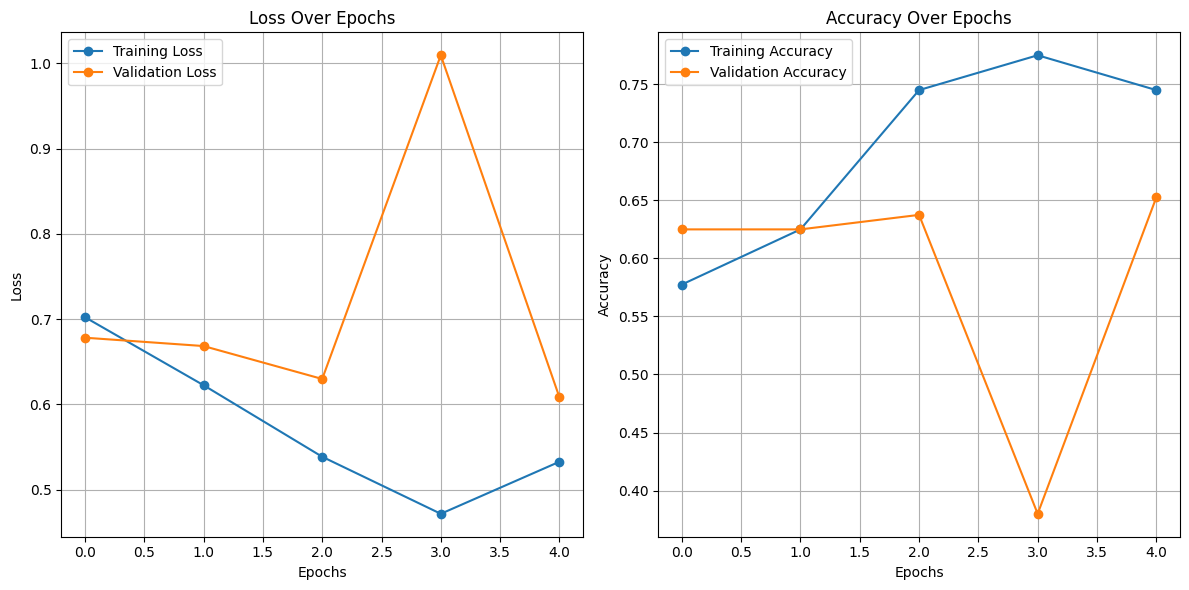

In [29]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['binary_accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [28]:
model.save('./classifier.keras')

# Testing

In [30]:
def preprocess_image(path):
    # Convert path to string if it's a tensor
    path = path.numpy().decode('utf-8') if tf.is_tensor(path) else path
    
    try:
        # Perform preprocessing
        rt, pt = smash_n_reconstruct(path)

        plt.subplot(1,2,1)
        plt.imshow(rt)
        plt.title('rich texture - AI generated image')
        plt.subplot(1,2,2)
        plt.imshow(pt)
        plt.title('poor texture - AI generated')
        plt.show()
        
        rt = apply_all_filters(rt)
        pt = apply_all_filters(pt)
        plt.subplot(1,2,1)
        plt.imshow(rt, cmap = 'gray')
        plt.title('rich texture - AI generated image')
        plt.subplot(1,2,2)
        plt.imshow(pt, cmap = 'gray')
        plt.title('poor texture - AI generated')
        plt.show()

        rt, pt = smash_n_reconstruct(path)
        
        # Apply filters and ensure consistent shape
        frt = tf.cast(tf.expand_dims(apply_all_filters(rt), axis=-1), dtype=tf.float64)
        fpt = tf.cast(tf.expand_dims(apply_all_filters(pt), axis=-1), dtype=tf.float64)
        
        # Ensure shape
        frt = tf.ensure_shape(frt, [256, 256, 1])
        fpt = tf.ensure_shape(fpt, [256, 256, 1])
        
        # Add batch dimension, so shape becomes [1, 256, 256, 1]
        frt = tf.expand_dims(frt, axis=0)
        fpt = tf.expand_dims(fpt, axis=0)
        
        return frt, fpt
        
    except Exception as e:
        print(f"Error processing {path}: {e}")
        # Return dummy tensors to avoid breaking the pipeline
        dummy = tf.zeros([256, 256, 1], dtype=tf.float32)
        return dummy, dummy


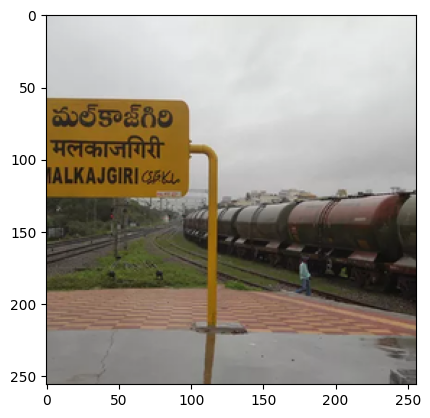

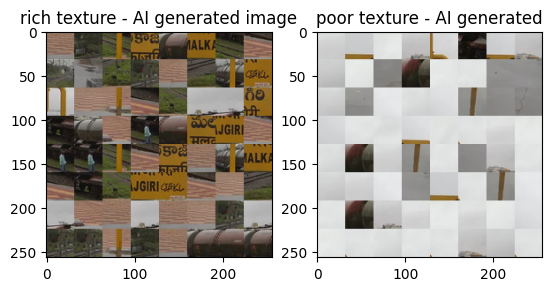

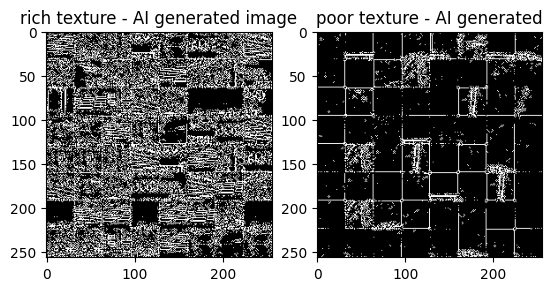

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
[[0.46159542]]


In [39]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2 
import keras
# or other image loading libraries


# Register the custom layer with Keras
keras.utils.get_custom_objects()['featureExtractionLayer'] = featureExtractionLayer

# Load the trained model from the .h5 file
model = load_model('/kaggle/working/classifier.keras')

# Example test data
test_image_path = '/kaggle/input/real-fake-image-full-dataset/0_real/1017.png'

# Display image
image = cv2.imread(test_image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# preprocess image
test_frt, test_fpt = preprocess_image(test_image_path)

# Make a prediction
predictions = model.predict([test_frt, test_fpt])
print(predictions)